In [1]:
# Testing whether BTC/USDT data follows a stationary distribution

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller 
from pandas._libs.tslibs.timestamps import Timestamp
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from coin_data import get_coin_data, normalize_features

In [6]:
data = get_coin_data('BTC/USDT', start_date = Timestamp('2005-01-01'))

In [8]:
data.describe()
# normal start date:  2017-08-17 04:00:00
# 60096 data points

,Open,High,Low,Close,Volume
count,60096.000000,60096.000000,60096.000000,60096.000000,60096.000000
mean,23707.912186,23823.416373,23585.456767,23708.858866,2956.839962
std,18511.690281,18595.838425,18422.355878,18512.169721,4218.998939
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000
25%,8190.607500,8233.487500,8151.150000,8191.430000,933.678854
50%,18108.630000,18220.700000,17968.790000,18113.425000,1631.643337
75%,37029.675000,37221.097500,36778.327500,37030.210000,3160.826534
max,73577.350000,73777.000000,73215.140000,73577.350000,137207.188600


In [9]:
data = normalize_features(data)

In [11]:
data.describe()
# start date: 2017-08-19 15:00:00
# 60037 data points

,Open,High,Low,Close,Volume,feature_Close,feature_High,feature_Low,feature_Open,feature_Volume
count,60037.000000,60037.000000,60037.000000,60037.000000,60037.000000,60037.000000,60037.000000,60037.000000,60037.000000,60037.000000
mean,23727.048961,23842.633478,23604.523773,23727.997795,2959.706873,0.000080,1.005058,0.994588,0.999991,0.298463
std,18510.710505,18594.861253,18421.356940,18511.188143,4220.079660,0.008343,0.006747,0.006771,0.008372,0.205194
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,-0.182115,1.000000,0.780028,0.852027,0.000000
25%,8199.990000,8241.910000,8158.240000,8200.000000,935.709510,-0.002596,1.001469,0.993363,0.997228,0.154560
50%,18185.600000,18281.010000,18049.260000,18192.490000,1633.261440,0.000087,1.003090,0.996526,0.999911,0.242886
75%,37050.560000,37239.990000,36800.000000,37050.770000,3164.297806,0.002790,1.006106,0.998319,1.002600,0.379482
max,73577.350000,73777.000000,73215.140000,73577.350000,137207.188600,0.173840,1.224797,1.000000,1.222795,1.000000


Looks good!

In [17]:
# function to check stationarity of different data columns
def check_stationarity(data: pd.DataFrame, column_name: str):
    assert column_name in data.columns, f"Column {column_name} not found in data"

    column = data[column_name]
    result = adfuller(column)

    print(f"Column: {column_name}")
    print('-- ADF Statistic:', result[0])
    print('-- p-value:', result[1])
    print('-- Critical Values:')
    for key, value in result[4].items():
        print(f'--- \t{key}: {value}')

    if result[1] <= 0.05:
        print("The time series is stationary (reject the null hypothesis)")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis)")

    plt.figure(figsize=(12, 6))
    plt.plot(column)
    plt.title(f'{column_name} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.show()

    years = column.index.year.unique()
    print('Checking stationarity by year')
    for year in years:
        year_data = column[column.index.year == year]
        result = adfuller(year_data)
        print(f"\nYear {year}:")
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])

Column: feature_Close
-- ADF Statistic: -34.37758313758746
-- p-value: 0.0
-- Critical Values:
--- 	1%: -3.430459020252708
--- 	5%: -2.86158818488948
--- 	10%: -2.566795647192271
The time series is stationary (reject the null hypothesis)


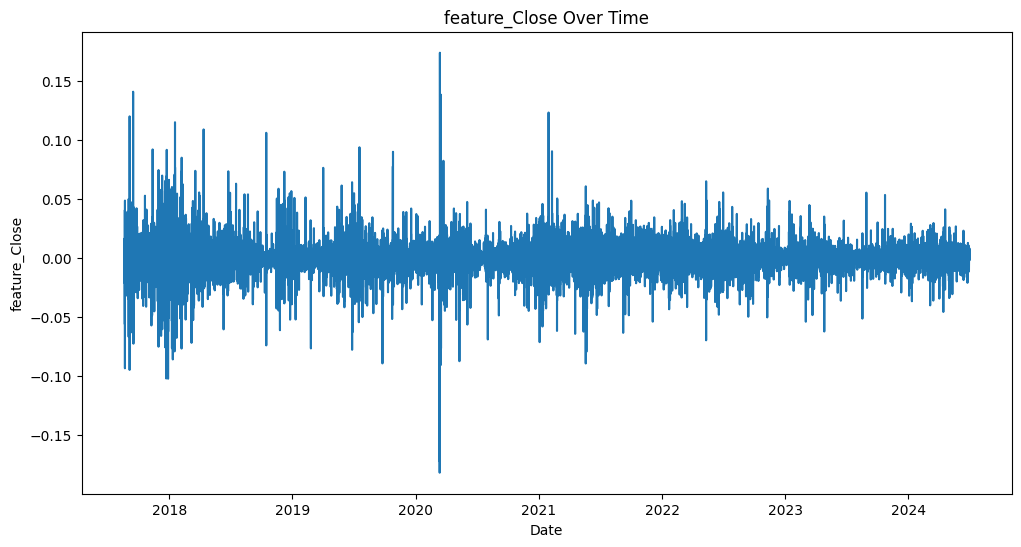

Checking stationarity by year

Year 2017:
ADF Statistic: -11.167580582405252
p-value: 2.6902323584459555e-20

Year 2018:
ADF Statistic: -18.407680877510764
p-value: 2.186917908701729e-30

Year 2019:
ADF Statistic: -14.984564476554903
p-value: 1.1489131921018893e-27

Year 2020:
ADF Statistic: -17.10849722642547
p-value: 7.393438823402286e-30

Year 2021:
ADF Statistic: -20.45529474747365
p-value: 0.0

Year 2022:
ADF Statistic: -93.35650947710178
p-value: 0.0

Year 2023:
ADF Statistic: -36.10463448331221
p-value: 0.0

Year 2024:
ADF Statistic: -48.074234735159884
p-value: 0.0


In [15]:
check_stationarity(data, 'feature_Close')

Column: feature_High
-- ADF Statistic: -14.938329250901335
-- p-value: 1.3341818199680857e-27
-- Critical Values:
--- 	1%: -3.43045903661299
--- 	5%: -2.861588192120282
--- 	10%: -2.5667956510410064
The time series is stationary (reject the null hypothesis)


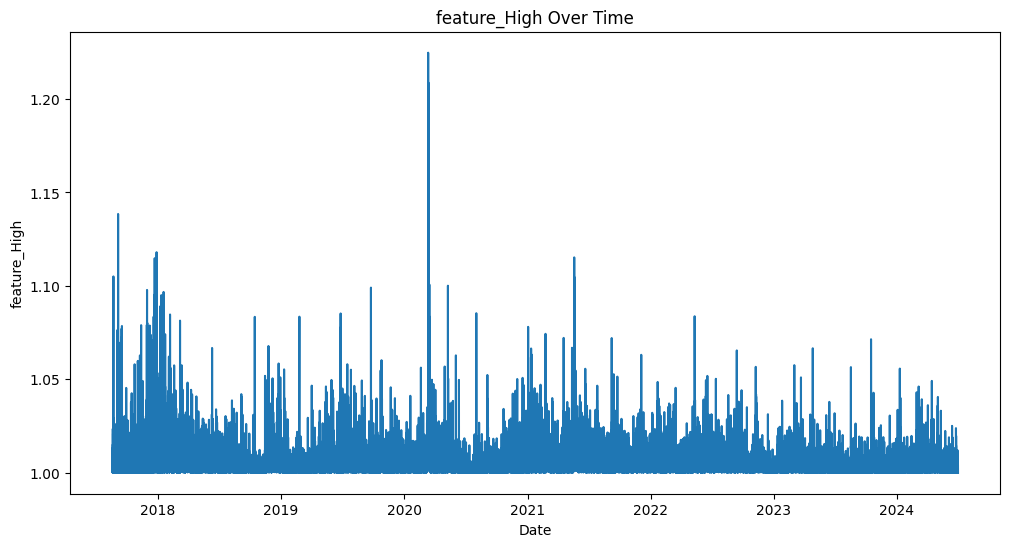

Checking stationarity by year

Year 2017:
ADF Statistic: -6.407555915243899
p-value: 1.9264165925877774e-08

Year 2018:
ADF Statistic: -7.716411807831294
p-value: 1.2249062118563302e-11

Year 2019:
ADF Statistic: -9.125528114830582
p-value: 3.121217895077142e-15

Year 2020:
ADF Statistic: -10.450494861537003
p-value: 1.4424559014628858e-18

Year 2021:
ADF Statistic: -8.433277073770054
p-value: 1.8454056456034962e-13

Year 2022:
ADF Statistic: -8.147776474869923
p-value: 9.881945583993443e-13

Year 2023:
ADF Statistic: -10.565200043381724
p-value: 7.548317741174089e-19

Year 2024:
ADF Statistic: -7.078279305146716
p-value: 4.739005425381008e-10


In [16]:
check_stationarity(data, 'feature_High')

Column: feature_Low
-- ADF Statistic: -13.93152637565191
-- p-value: 5.079230354441601e-26
-- Critical Values:
--- 	1%: -3.430459031159017
--- 	5%: -2.8615881897097735
--- 	10%: -2.566795649757966
The time series is stationary (reject the null hypothesis)


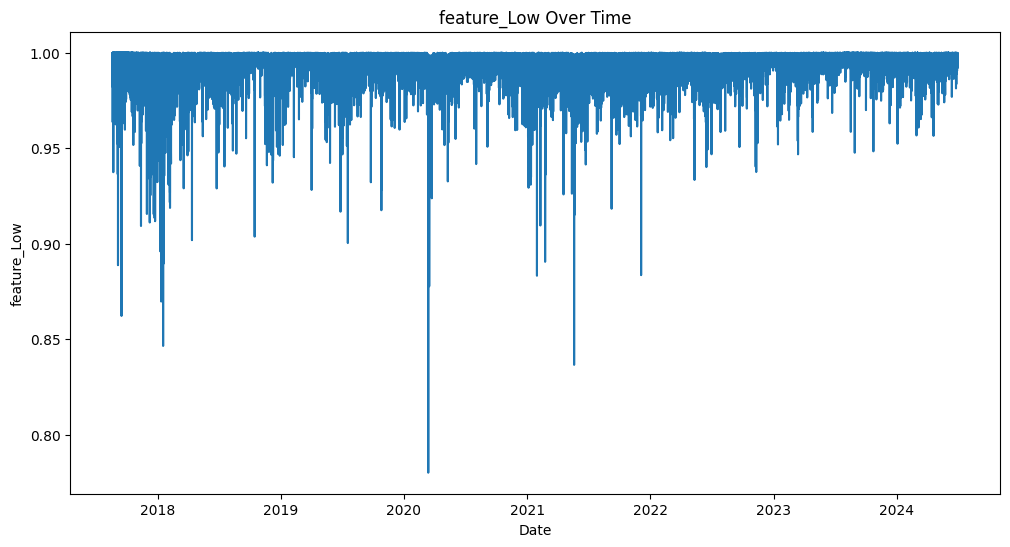

Checking stationarity by year

Year 2017:
ADF Statistic: -7.082731878581282
p-value: 4.6214071648256284e-10

Year 2018:
ADF Statistic: -6.963637101227872
p-value: 9.030819352979882e-10

Year 2019:
ADF Statistic: -7.502292517744336
p-value: 4.222394233621654e-11

Year 2020:
ADF Statistic: -9.295052570175045
p-value: 1.1521281714529301e-15

Year 2021:
ADF Statistic: -7.922806910413159
p-value: 3.68551295982329e-12

Year 2022:
ADF Statistic: -8.570433721471902
p-value: 8.22578695975401e-14

Year 2023:
ADF Statistic: -9.424188121519204
p-value: 5.401825675029955e-16

Year 2024:
ADF Statistic: -7.188325533081229
p-value: 2.5421869661577703e-10


In [18]:
check_stationarity(data, 'feature_Low')

Column: feature_Open
-- ADF Statistic: -33.89765925672468
-- p-value: 0.0
-- Critical Values:
--- 	1%: -3.430459020252708
--- 	5%: -2.86158818488948
--- 	10%: -2.566795647192271
The time series is stationary (reject the null hypothesis)


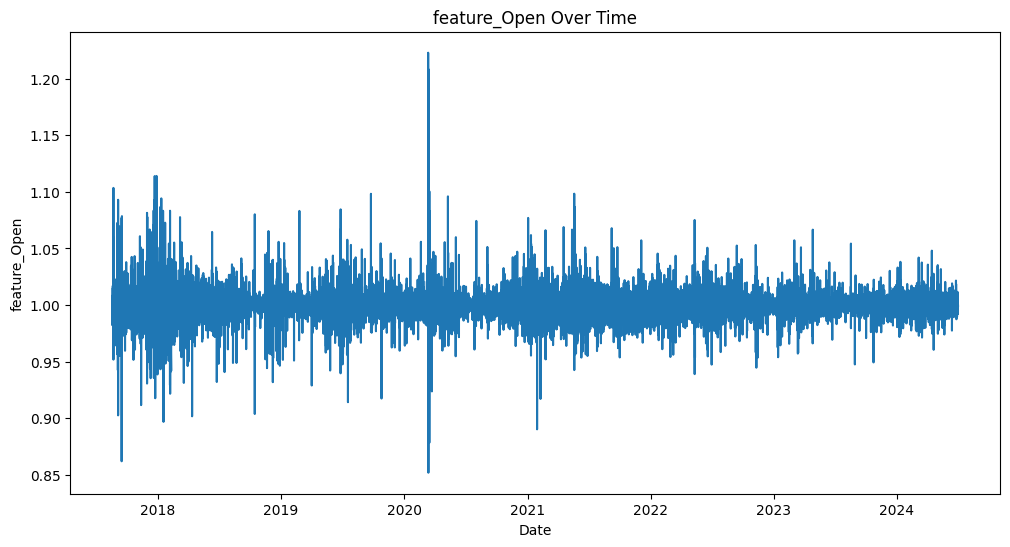

Checking stationarity by year

Year 2017:
ADF Statistic: -11.073419464465506
p-value: 4.4940379585809406e-20

Year 2018:
ADF Statistic: -18.840724711282054
p-value: 0.0

Year 2019:
ADF Statistic: -15.049313792890707
p-value: 9.34398063442788e-28

Year 2020:
ADF Statistic: -14.57670419453103
p-value: 4.536751710337906e-27

Year 2021:
ADF Statistic: -20.403210029263132
p-value: 0.0

Year 2022:
ADF Statistic: -93.34118721163482
p-value: 0.0

Year 2023:
ADF Statistic: -36.18922133358483
p-value: 0.0

Year 2024:
ADF Statistic: -48.06513270000096
p-value: 0.0


In [19]:
check_stationarity(data, 'feature_Open')

Column: feature_Volume
-- ADF Statistic: -28.153447631510204
-- p-value: 0.0
-- Critical Values:
--- 	1%: -3.4304590347949384
--- 	5%: -2.8615881913167525
--- 	10%: -2.566795650613312
The time series is stationary (reject the null hypothesis)


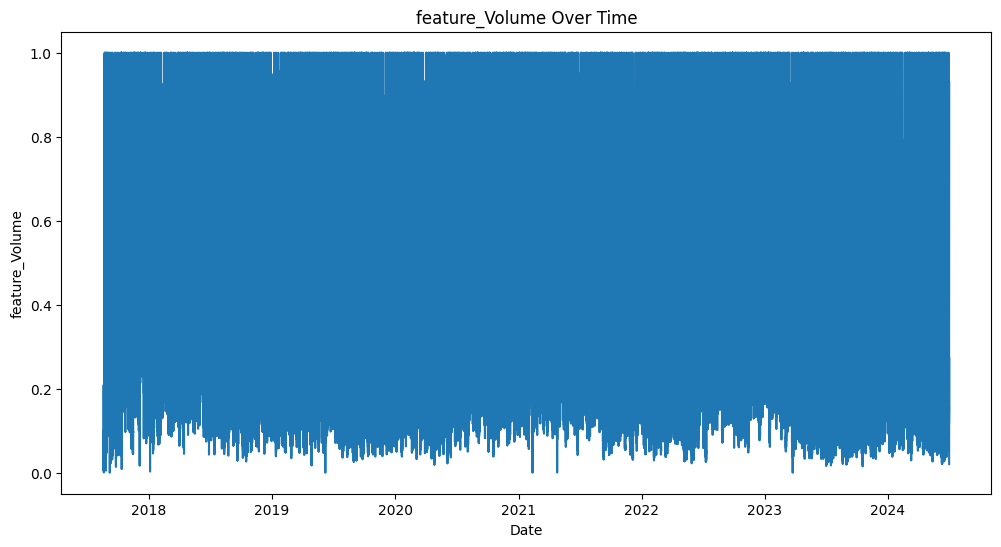

Checking stationarity by year

Year 2017:
ADF Statistic: -8.057929489500665
p-value: 1.6729397756624543e-12

Year 2018:
ADF Statistic: -12.071916710990644
p-value: 2.3371428307297496e-22

Year 2019:
ADF Statistic: -13.271337907609917
p-value: 8.026030607156791e-25

Year 2020:
ADF Statistic: -14.331825583137348
p-value: 1.096580362712134e-26

Year 2021:
ADF Statistic: -13.757401445597294
p-value: 1.0235008052510912e-25

Year 2022:
ADF Statistic: -13.114144940901797
p-value: 1.6120554392420055e-24

Year 2023:
ADF Statistic: -13.07847367297073
p-value: 1.8923694413446422e-24

Year 2024:
ADF Statistic: -10.640855013972104
p-value: 4.934412350734763e-19


In [20]:
check_stationarity(data, 'feature_Volume')

All stationary!